In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import operator

In [ ]:
df = pd.read_csv('./blood-pressure.csv')

In [ ]:
df.head()

,Index,One,Age,Blood_Pressure
0,1,1,39,144
1,2,1,47,220
2,3,1,45,138
3,4,1,47,145
4,5,1,65,162


In [ ]:
X = np.array(df['Age'])
y = np.array(df['Blood_Pressure'])

In [ ]:
X = X[:, np.newaxis]
lr_model = LinearRegression()
lr_model.fit(X, y)

LinearRegression()

In [ ]:
w = lr_model.coef_
b = lr_model.intercept_

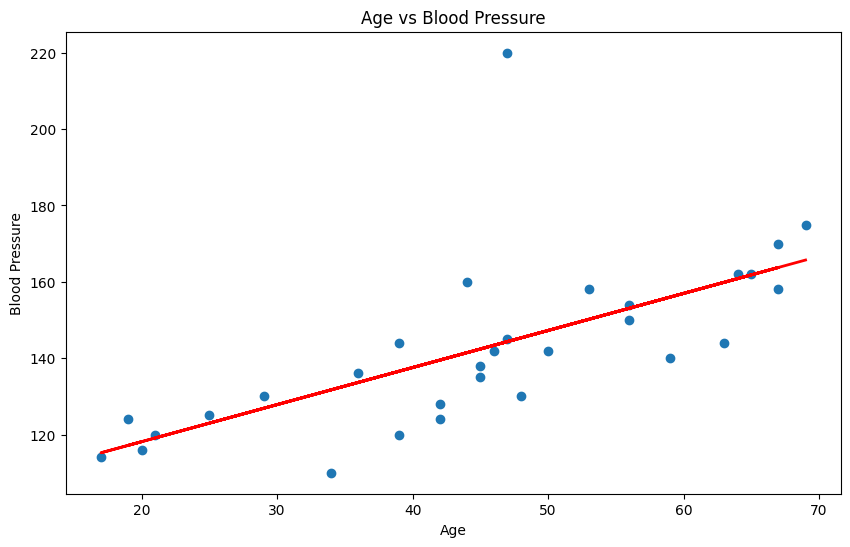

In [ ]:
plt.figure(figsize=(10, 6)) #fig size, by default it will look smaller
plt.scatter(X, y) # scatter plot to show data points
plt.plot(X, lr_model.predict(X), color='red', linewidth=2, label='Fitted Line') #plotting the line

plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs Blood Pressure')

plt.show()


In [ ]:
print(f'w={w}')
print(f'b={b}')

In [ ]:
y_pred = lr_model.predict(X)

In [ ]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
r2 = r2_score(y, y_pred)

In [ ]:
print(f'RMSE = {rmse}\nMAE = {mae}\nMAPE = {mape}%\nR2_Score = {r2}')

RMSE = 16.7266693052792
MAE = 9.541101239615271
MAPE = 6.3391279778184355%
R2_Score = 0.43239473192759537


In [ ]:
test_size_resolution = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
set_results = []

In [ ]:
for x in test_size_resolution:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=0)
  lr_model.fit(X_train, y_train)
  y_train_pred = lr_model.predict(X_train)
  y_test_pred = lr_model.predict(X_test)

  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  train_mae = mean_absolute_error(y_train, y_train_pred)
  test_mae = mean_absolute_error(y_test, y_test_pred)
  train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
  test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
  train_r2 = r2_score(y_train, y_train_pred)
  test_r2 = r2_score(y_test, y_test_pred)

  set_results.append((x, train_rmse, test_rmse, train_mae, test_mae, train_mape, test_mape, train_r2, test_r2))

In [ ]:
test_rmse, test_mae, test_mape, test_r2 = [], [], [], []
for result in set_results:
    print(f'####################### Test Size: {result[0]} #######################\nTrain RMSE: {result[1]}, Test RMSE: {result[2]}\nTrain MAE: {result[3]}, Test MAE: {result[4]}\nTrain MAPE: {result[5]}%, Test MAPE: {result[6]}%\nTrain R2: {result[7]}, Test R2: {result[8]}\n')
    test_rmse.append(result[2])
    test_mae.append(result[4])
    test_mape.append(result[6])
    test_r2.append(result[8])

####################### Test Size: 0.1 #######################
Train RMSE: 17.070667197010778, Test RMSE: 13.674875830669391
Train MAE: 9.633822759832432, Test MAE: 9.58331149181538
Train MAPE: 6.229488750353252%, Test MAPE: 8.371369409964453%
Train R2: 0.4080050671488993, Test R2: -0.42870972908152183

####################### Test Size: 0.2 #######################
Train RMSE: 17.418161097700924, Test RMSE: 13.754656917604008
Train MAE: 9.367224642066441, Test MAE: 10.645754729903048
Train MAPE: 6.0284788329499515%, Test MAPE: 8.041155323320904%
Train R2: 0.4268387951568047, Test R2: 0.4404944443312493

####################### Test Size: 0.3 #######################
Train RMSE: 18.586727619679266, Test RMSE: 11.409740122727186
Train MAE: 10.364314375436143, Test MAE: 8.099378731487937
Train MAPE: 6.641438764528589%, Test MAPE: 6.096674046900261%
Train R2: 0.3729546453775703, Test R2: 0.5851134819357169

####################### Test Size: 0.4 #######################
Train RMSE: 19.472072

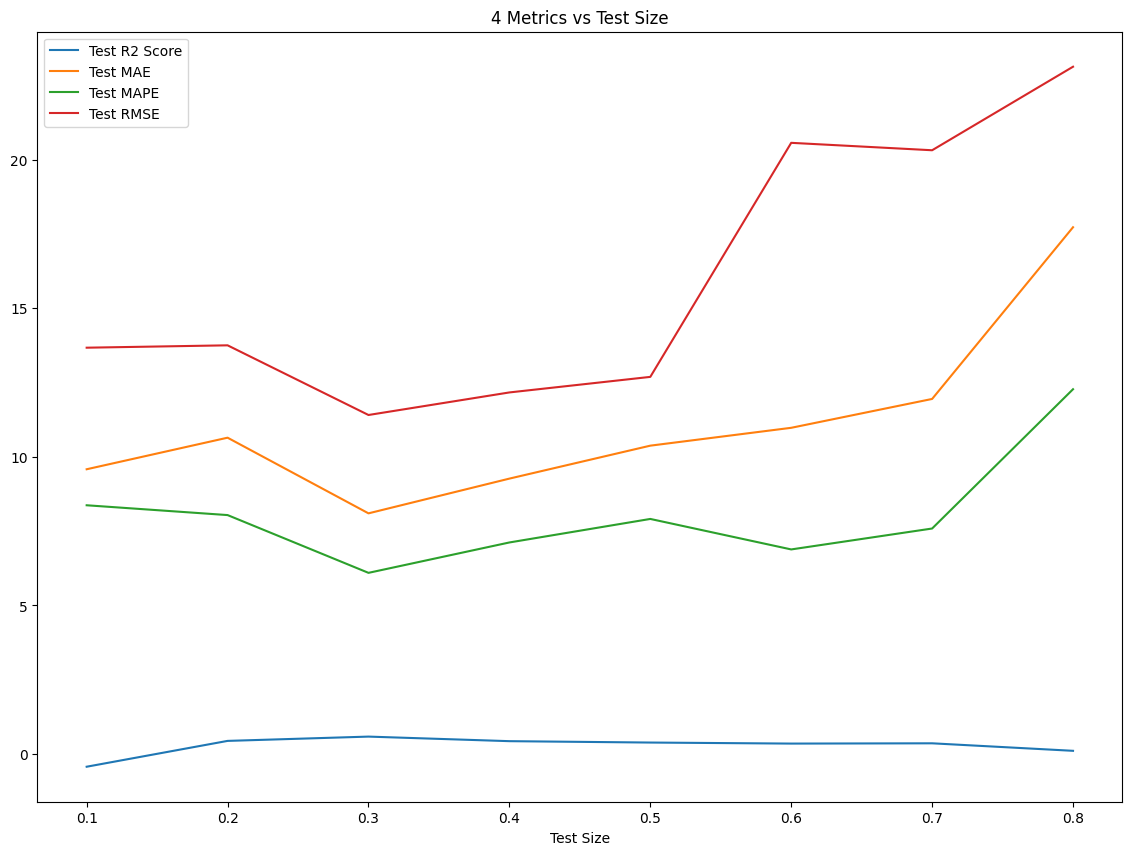

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(test_size_resolution, test_r2, label='Test R2 Score')
plt.plot(test_size_resolution, test_mae, label='Test MAE')
plt.plot(test_size_resolution, test_mape, label='Test MAPE')
plt.plot(test_size_resolution, test_rmse, label='Test RMSE')
plt.xlabel('Test Size')
plt.legend()
plt.title('4 Metrics vs Test Size')
plt.show()

## Analysis
Overall, among all the test sizes the best is, I would say, 0.3, because it provided the best balance between training and testing performances: lowest RMSE/MAE and highest R2 score. Also, as we discussed in the class, overfitting and underfitting can be discovered in that task. As you can see in the graph, there is some degree of overfitting in small test size (0.1) and underfitting in larger test sizes like 0.8.

Coming to the model analysis, I think that without Split method, all errors will be calculated on the same data and lead to risk of being overfitted. With Split, test data size and training data size, model can be accepted to be more realistic evaluation of new data.

In [ ]:
best_test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=best_test_size)
degrees = range(2, 11)

In [ ]:
poly_results = []
model = LinearRegression()

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    poly_results.append((degree, train_rmse, test_rmse, train_mae, test_mae, train_mape, test_mape, train_r2, test_r2))

In [ ]:
test_rmse, test_mae, test_mape, test_r2 = [], [], [], []
for result in poly_results:
    print(f'############## Degree: {result[0]} ##############\nTrain RMSE: {result[1]}, Test RMSE: {result[2]}\nTrain MAE: {result[3]}, Test MAE: {result[4]}\nTrain MAPE: {result[5]}, Test MAPE: {result[6]}\nTrain R2: {result[7]}, Test R2: {result[8]}\n')
    test_rmse.append(result[2])
    test_mae.append(result[4])
    test_mape.append(result[6])
    test_r2.append(result[8])

############## Degree: 2 ##############
Train RMSE: 18.581638412562203, Test RMSE: 11.465796911609816
Train MAE: 10.24302378854727, Test MAE: 8.195875757534246
Train MAPE: 6.547946780654357, Test MAPE: 6.16799821298135
Train R2: 0.37329797927287645, Test R2: 0.5810267388935797

############## Degree: 3 ##############
Train RMSE: 18.55634566373045, Test RMSE: 11.511167440663753
Train MAE: 10.477095190921261, Test MAE: 8.979399719734186
Train MAPE: 6.693770223624633, Test MAPE: 6.732988439568402
Train R2: 0.3750029127663753, Test R2: 0.5777043970881814

############## Degree: 4 ##############
Train RMSE: 18.092385377510382, Test RMSE: 15.70079056438311
Train MAE: 11.065203720738937, Test MAE: 13.485829959688747
Train MAPE: 7.220237000861215, Test MAPE: 10.431737733579967
Train R2: 0.4058655358613016, Test R2: 0.2143649365723812

############## Degree: 5 ##############
Train RMSE: 17.954337719012692, Test RMSE: 9.842847589741579
Train MAE: 10.989899668979026, Test MAE: 9.04804460082888
Tr

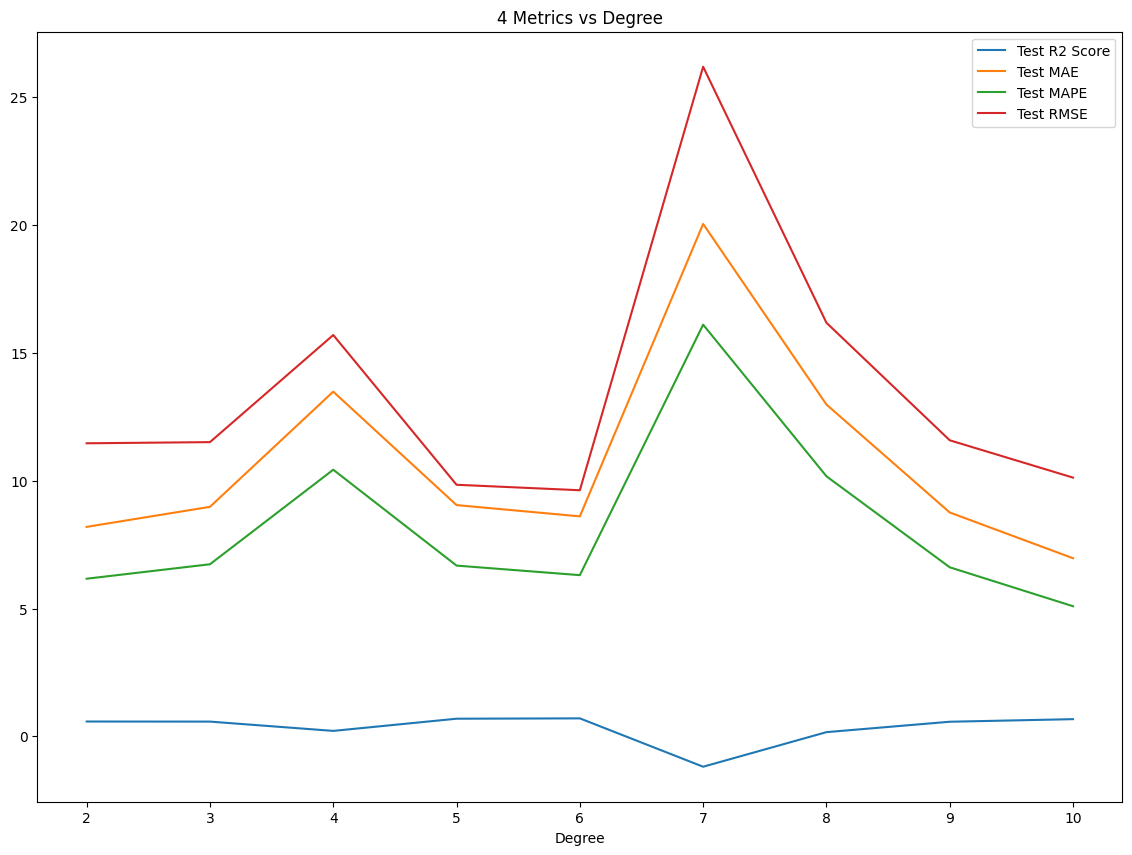

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(degrees, test_r2, label='Test R2 Score')
plt.plot(degrees, test_mae, label='Test MAE')
plt.plot(degrees, test_mape, label='Test MAPE')
plt.plot(degrees, test_rmse, label='Test RMSE')
plt.xlabel('Degree')
plt.legend()
plt.title('4 Metrics vs Degree')
plt.show()

### **Analysis**:
- The TestMAE is slightly higher than in the OLS model, but the TestR2 is significantly better at 0.705, showing that the Polynomial model explains more variance in the test data(70.5%).
- TrainRMSE and TrainR2 suggest that the Polynomial OLS model fits the training data better than the simple OLS model.
- The MAPE values are slightly higher in the Polynomial OLS model, but the trade-off in higher R2 and lower RMSE makes it a stronger model in terms of overall performance.

Overall, the Polynomial model has a higher R2 on both training and test data, suggesting it better captures the variance in the data.Also, while the Polynomial model has a higher R2, the slightly increased TrainMAPE might indicate a bit of overfitting, but this is offset by better generalization on test data. Therefore, I can say that Polynomial OLS model(degree 6) outperforms the standard OLS model in terms of prediction accuracy, as evidenced by the lower TestRMSE and higher TestR2.